# Лабораторная работа 1
## Персептрон

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Класс персептрона для классификации на 2 класса

In [2]:
class Perceptron:
    # Инициализация 
    def __init__(self, in_size, learning_rate):
        self.w = np.random.randn(in_size + 1) / np.sqrt(in_size)
        self.learning_rate = learning_rate
        
    # Функция ошибки
    def loss(self, x):
        return 1 if x > 0 else 0
    # Обучение
    def fit(self, X, y, epochs=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                p = self.loss(np.dot(x, self.w))
                if p != target:
                    error = (p - target)
                    self.w -= self.learning_rate * error * x
            print(f'Epoch: {epoch+1}, error: {error}, weights: {self.w}')
    # Предсказание
    def predict(self, X):
        X = np.atleast_2d(X)
        X = np.c_[X, np.ones((X.shape[0]))]
        return self.loss(np.dot(X, self.w))
    # Получить веса
    def get_weights(self):
        return self.w

## Обучающая выборка 1

In [3]:
points1 = np.array([
    [1.1, -0.3],
    [-1.5, 3.3],
    [0.8, 0.4],
    [4.1, -2.2],
    [2.5, 2.5],
    [-1.2, 0.6],
], dtype=np.float64)
labels1 = np.array([1, 0, 1, 1, 0, 1], dtype=np.int32)

In [4]:
perceptron = Perceptron(2, 0.1)
perceptron.fit(points1, labels1)
# Достатоно быстро веса перестают изменяться 
# Это вызвано скорее всего тем, что быстро достигается приемлемое качество 
weights = perceptron.get_weights()

Epoch: 1, error: -1, weights: [-0.10896043 -0.05635205 -0.05913764]
Epoch: 2, error: -1, weights: [-0.11896043 -0.02635205  0.14086236]
Epoch: 3, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 4, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 5, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 6, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 7, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 8, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 9, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]
Epoch: 10, error: -1, weights: [-0.00896043 -0.25635205  0.24086236]


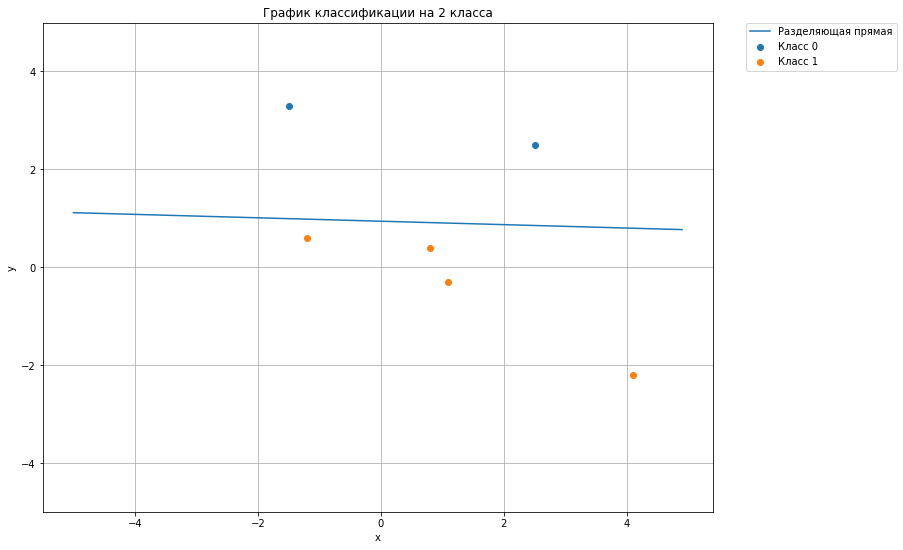

In [5]:
# Коорд для прямой
x = np.arange(-5, 5, 0.1)
y = np.apply_along_axis(lambda t: (-weights[2] - t * weights[0]) / weights[1], 0, x)

# Коорд для точек
x_c1 = points1[labels1 == 0, 0]
y_c1 = points1[labels1 == 0, 1]

x_c2 = points1[labels1 == 1, 0]
y_c2 = points1[labels1 == 1, 1]


# Строим график
plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 2 класса')
line = plt.plot(x, y, label='Разделяющая прямая')
c1 = plt.scatter(x_c1, y_c1, label='Класс 0')
c2 = plt.scatter(x_c2, y_c2, label='Класс 1')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

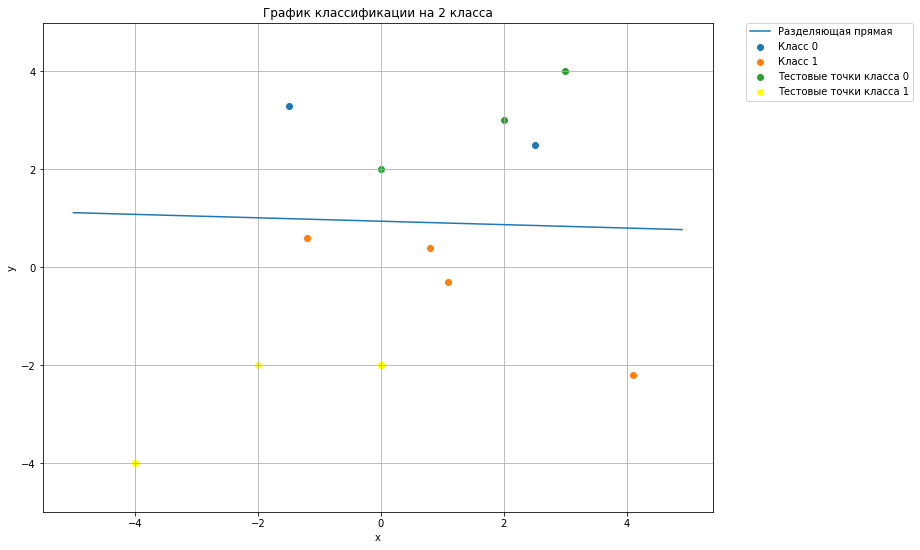

In [6]:
# Коорд для прямой
x = np.arange(-5, 5, 0.1)
y = np.apply_along_axis(lambda t: (-weights[2] - t * weights[0]) / weights[1], 0, x)

# Коорд для точек
x_c1 = points1[labels1 == 0, 0]
y_c1 = points1[labels1 == 0, 1]

x_c2 = points1[labels1 == 1, 0]
y_c2 = points1[labels1 == 1, 1]


# Строим график
plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 2 класса')
line = plt.plot(x, y, label='Разделяющая прямая')
c1 = plt.scatter(x_c1, y_c1, label='Класс 0')
c2 = plt.scatter(x_c2, y_c2, label='Класс 1')
plt.scatter([0,2,3],[2,3,4],label='Тестовые точки класса 0')
plt.scatter([-4,-2,0],[-4,-2,-2],label='Тестовые точки класса 1',color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Задача решена хорошо, потому что множества являются линейно разделимыми


### Добавление точки для получения двух линейно неразделимых множеств

In [7]:
# Добавляем точку, чтоб классы не был линейно разделимы
points1 = np.concatenate([points1, np.array([[0, 4]])])
labels1 = np.concatenate([labels1, np.array([1])])

Epoch: 1, error: -1, weights: [-0.21680676 -0.14679411  1.96829939]
Epoch: 2, error: -1, weights: [-0.31680676 -0.32679411  1.86829939]
Epoch: 3, error: -1, weights: [-0.16680676 -0.25679411  1.86829939]
Epoch: 4, error: -1, weights: [-0.26680676 -0.43679411  1.76829939]
Epoch: 5, error: -1, weights: [-0.11680676 -0.36679411  1.76829939]
Epoch: 6, error: -1, weights: [-0.21680676 -0.54679411  1.66829939]
Epoch: 7, error: -1, weights: [-0.06680676 -0.47679411  1.66829939]
Epoch: 8, error: -1, weights: [ 0.08319324 -0.40679411  1.66829939]
Epoch: 9, error: -1, weights: [-0.01680676 -0.58679411  1.56829939]
Epoch: 10, error: -1, weights: [-0.26680676 -0.43679411  1.56829939]


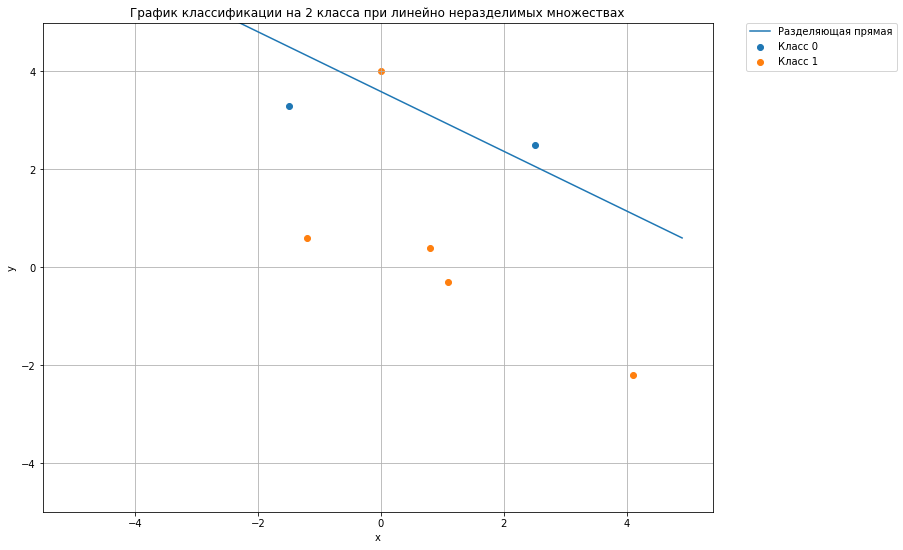

In [8]:
# Создаем модель 
perceptron = Perceptron(2, 0.1)
# Обучаем
perceptron.fit(points1, labels1)

weights = perceptron.get_weights()
# Коорд для прямой
x = np.arange(-5, 5, 0.1)
y = np.apply_along_axis(lambda t: (-weights[2] - t * weights[0]) / weights[1], 0, x)

# Коорд для точек
x_c1 = points1[labels1 == 0, 0]
y_c1 = points1[labels1 == 0, 1]

x_c2 = points1[labels1 == 1, 0]
y_c2 = points1[labels1 == 1, 1]

# Строим график 
plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 2 класса при линейно неразделимых множествах')
plt.plot(x, y, label='Разделяющая прямая')
plt.scatter(x_c1, y_c1, label='Класс 0')
plt.scatter(x_c2, y_c2, label='Класс 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Как видно из графика, после добавления дополнительной точки, множества стали линейно неразделимы и поэтому персептрон, не смог разделить точки на 2 класса

## Класс персептрона для классификации на 4 класса

In [9]:
class Perceptron:
    # Инициализация
    def __init__(self, in_size, out_size, learning_rate):
        self.w = np.random.randn(out_size, in_size + 1) / np.sqrt(in_size)
        self.learning_rate = learning_rate
    # Функция потерь
    def loss(self, x):
        return np.vectorize(lambda t: 1 if t > 0 else 0)(x)
    # Обучение
    def fit(self, X, y, epochs=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                p = self.loss(np.dot(x, self.w.T))
                if not np.array_equal(p, target):
                    error = np.reshape(p - target, (2, 1))
                    self.w -= self.learning_rate * error * x
            print(f'Epoch: {epoch+1}, error: {error.T}, weights: {self.w}')
    # Предсказание 
    def predict(self, X):
        X = np.atleast_2d(X)
        X = np.c_[X, np.ones((X.shape[0]))]
        return self.loss(np.dot(X, self.w.T))
    # Получить веса
    def get_weights(self):
        return self.w

In [10]:
# Выборка
points2 = np.array([
    [3.6, 1.3],
    [-1.5, 4.9],
    [-2.8, 1.5],
    [1, -1.2],
    [-3.6, -4.8],
    [-0.8, -3.2],
    [2.2, -1.3],
    [3.4, 2.3]
], dtype=np.float64)
labels2 = np.array([
    [0, 0],
    [0, 1],
    [1, 1],
    [0, 0],
    [1, 0],
    [1, 0],
    [0, 0],
    [0, 0]
], dtype=np.int32)

In [11]:
# Создаем модель
perceptron = Perceptron(2, 2, 0.1)
# Обучаем
perceptron.fit(points2, labels2,epochs=100)
# Берем веса
weights = perceptron.get_weights()


Epoch: 1, error: [[1 0]], weights: [[-0.52536507 -0.6028089   1.0389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 2, error: [[1 0]], weights: [[-0.84536507 -0.3528089   0.8389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 3, error: [[1 0]], weights: [[-0.79536507 -0.7228089   0.6389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 4, error: [[1 0]], weights: [[-0.89536507 -0.6028089   0.5389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 5, error: [[1 0]], weights: [[-0.99536507 -0.4828089   0.4389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 6, error: [[1 0]], weights: [[-1.09536507 -0.3628089   0.3389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 7, error: [[1 0]], weights: [[-1.04536507 -0.7328089   0.1389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 8, error: [[1 0]], weights: [[-1.04536507 -0.7328089   0.1389784 ]
 [-0.18273687  0.46462148 -0.49427419]]
Epoch: 9, error: [[1 0]], weights: [[-1.04536507 -0.7328089   0.1389784 ]
 [-0.18273687 

In [12]:
# Функция для работы с точками
def partition_on_class(points, labels, mask):
    res = []
    for i in np.arange(points.shape[0]):
        if np.array_equal(labels[i], mask):
            res.append(points[i])
    return np.array(res)

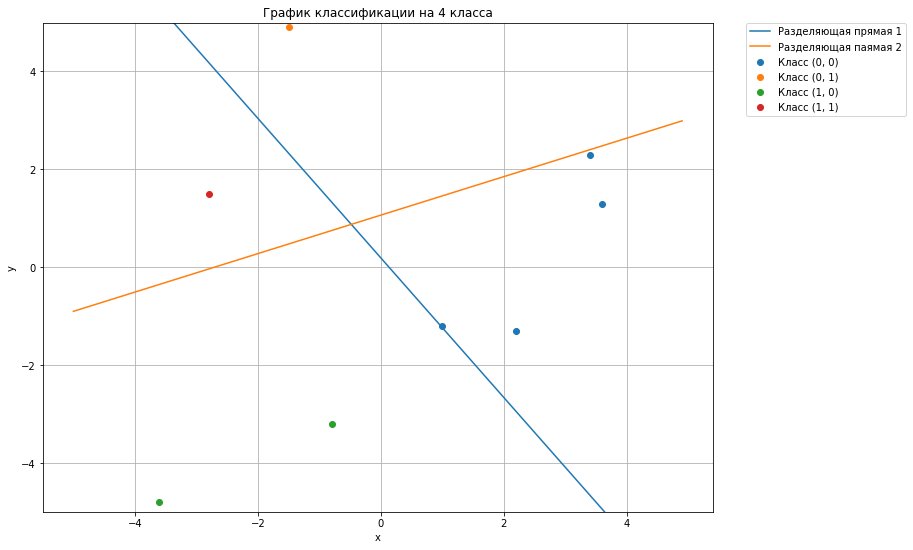

In [13]:
# Коорд прямых
x = np.arange(-5, 5, 0.1)

y1 = np.vectorize(lambda t: (-weights[0][2] - t * weights[0][0]) / weights[0][1])(x)
y2 = np.vectorize(lambda t: (-weights[1][2] - t * weights[1][0]) / weights[1][1])(x)

# Точки классов
points_c1 = partition_on_class(points2, labels2, [0, 0])
points_c2 = partition_on_class(points2, labels2, [0, 1])
points_c3 = partition_on_class(points2, labels2, [1, 0])
points_c4 = partition_on_class(points2, labels2, [1, 1])

# Строим график 
plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 4 класса')
plt.plot(x, y1, label='Разделяющая прямая 1')
plt.plot(x, y2, label='Разделяющая паямая 2')
plt.scatter(points_c1[:,0], points_c1[:,1], label='Класс (0, 0)')
plt.scatter(points_c2[:,0], points_c2[:,1], label='Класс (0, 1)')
plt.scatter(points_c3[:,0], points_c3[:,1], label='Класс (1, 0)')
plt.scatter(points_c4[:,0], points_c4[:,1], label='Класс (1, 1)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Задача решена хорошо, потому что множества являются линейно разделимыми. В задаче 4 класса, потому 2 прямые разделяют выборку.
